In [25]:
!pip install torch torchvision opencv-python matplotlib
!git clone https://github.com/ultralytics/yolov5
!cd yolov5
!pip install -r requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [26]:
from google.colab import files
uploaded = files.upload()


Saving road rush.jpg to road rush (2).jpg


In [27]:
source = list(uploaded.keys())[0]
print("Uploaded file:", source)


Uploaded file: road rush (2).jpg


In [28]:
!pip install ultralytics

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-8-1 Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


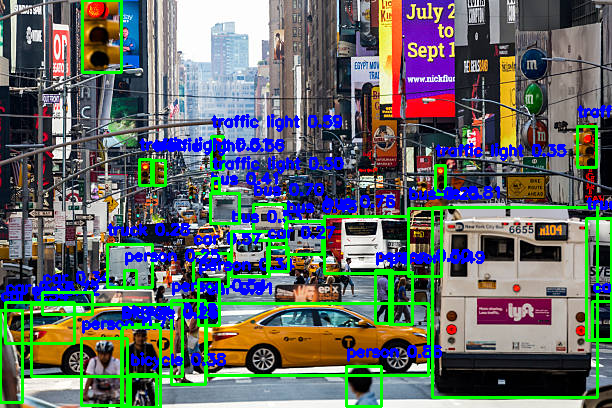

In [29]:
import torch
import cv2
from google.colab.patches import cv2_imshow

# Load YOLOv5s model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
model.eval()

def draw_boxes(img, results):
    for *box, conf, cls in results:
        x1, y1, x2, y2 = map(int, box)
        label = f'{model.names[int(cls)]} {conf:.2f}'
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    return img

def detect_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        raise ValueError(f"Image not found: {img_path}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = model(img_rgb)
    detections = results.xyxy[0]
    output_img = draw_boxes(img, detections)
    cv2_imshow(output_img)

# Run detection
if source.lower().endswith(('.jpg', '.jpeg', '.png')):
    detect_image(source)


In [31]:
import os
from IPython.display import HTML
from base64 import b64encode

def detect_video(video_path, output_path='output.mp4'):
    cap = cv2.VideoCapture(video_path)
    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps    = cap.get(cv2.CAP_PROP_FPS)

    out = cv2.VideoWriter(output_path,
                          cv2.VideoWriter_fourcc(*'mp4v'),
                          fps, (width, height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        results = model(frame)
        detections = results.xyxy[0]
        frame = draw_boxes(frame, detections)
        out.write(frame)

    cap.release()
    out.release()

def show_video(path):
    mp4 = open(path, 'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    return HTML(f"""<video width=640 controls><source src="{data_url}" type="video/mp4"></video>""")

# Run detection
if source.lower().endswith('.mp4'):
    detect_video(source, 'detected_output.mp4')
    show_video('detected_output.mp4')
